## Load Libraries

In [7]:
library("rcompanion")
library("fastR2")
library("car")
library("tidyverse")

## Load in Data

In [2]:
honey <- read.csv("/Users/kenyashiafernandez/Downloads/honey.csv")

In [4]:
head(honey)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>
1,AL,9000,66,594000,214000,1.90,1129000,2008
2,AZ,25000,64,1600000,336000,1.26,2016000,2008
3,AR,28000,75,2100000,525000,1.35,2835000,2008
4,CA,360000,51,18360000,4039000,1.39,25520000,2008
5,CO,27000,45,1215000,656000,1.51,1835000,2008
6,FL,150000,79,11850000,1304000,1.32,15642000,2008


## Determine whether honey production totalprod has changed over the years (year) using a repeated measures ANOVA.

In [8]:
str(honey)

'data.frame':	201 obs. of  8 variables:
 $ state      : chr  "AL" "AZ" "AR" "CA" ...
 $ numcol     : num  9000 25000 28000 360000 27000 150000 65000 10000 90000 8000 ...
 $ yieldpercol: int  66 64 75 51 45 79 71 90 40 56 ...
 $ totalprod  : num  594000 1600000 2100000 18360000 1215000 ...
 $ stocks     : int  214000 336000 525000 4039000 656000 1304000 369000 225000 1440000 116000 ...
 $ priceperlb : num  1.9 1.26 1.35 1.39 1.51 1.32 1.52 1.59 1.46 2.59 ...
 $ prodvalue  : int  1129000 2016000 2835000 25520000 1835000 15642000 7015000 1431000 5256000 1160000 ...
 $ year       : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...


In [9]:
unique(honey$year)

[1] 2008 2009 2010 2011 2012

## Data Wrangling

In [10]:
years = length(unique(honey$year))

In [11]:
year_vector = unique(honey$year)

In [12]:
year_vector[1]

[1] 2008

In [13]:
year1 = honey %>% filter(year == year_vector[1])

In [14]:
year1

state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>
AL,9000,66,594000,214000,1.90,1129000,2008
AZ,25000,64,1600000,336000,1.26,2016000,2008
AR,28000,75,2100000,525000,1.35,2835000,2008
CA,360000,51,18360000,4039000,1.39,25520000,2008
CO,27000,45,1215000,656000,1.51,1835000,2008
FL,150000,79,11850000,1304000,1.32,15642000,2008
GA,65000,71,4615000,369000,1.52,7015000,2008
HI,10000,90,900000,225000,1.59,1431000,2008
ID,90000,40,3600000,1440000,1.46,5256000,2008


In [16]:
year2 = honey %>% filter(year == year_vector[2])

In [17]:
year3 = honey %>% filter(year == year_vector[3])

In [18]:
year4 = honey %>% filter(year == year_vector[4])

In [19]:
year5 = honey %>% filter(year == year_vector[5])

In [20]:
year5

state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>
AL,8000,54,432000,65000,2.47,1067000,2012
AZ,22000,46,1012000,253000,1.79,1811000,2012
AR,25000,63,1575000,189000,1.98,3119000,2012
CA,330000,35,11550000,3119000,1.94,22407000,2012
CO,25000,48,1200000,468000,2.07,2484000,2012
FL,193000,64,12352000,1235000,1.84,22728000,2012
GA,59000,51,3009000,181000,1.92,5777000,2012
HI,10000,75,750000,263000,4.15,3113000,2012
ID,92000,32,2944000,530000,1.63,4799000,2012


### Assumptions

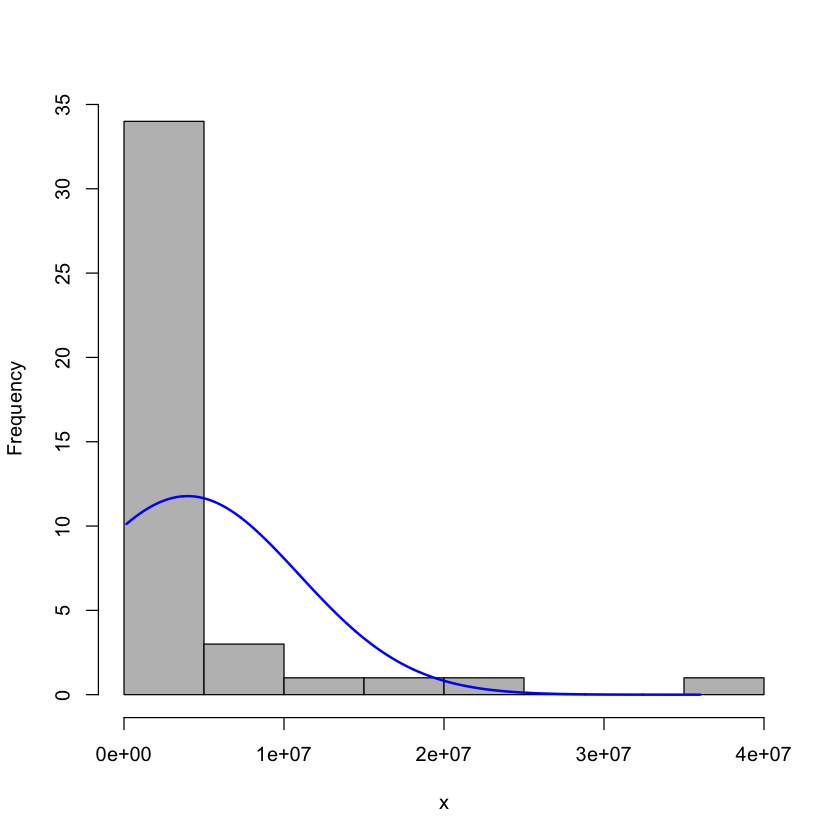

In [21]:
plotNormalHistogram(year1$totalprod)
## positively skewed

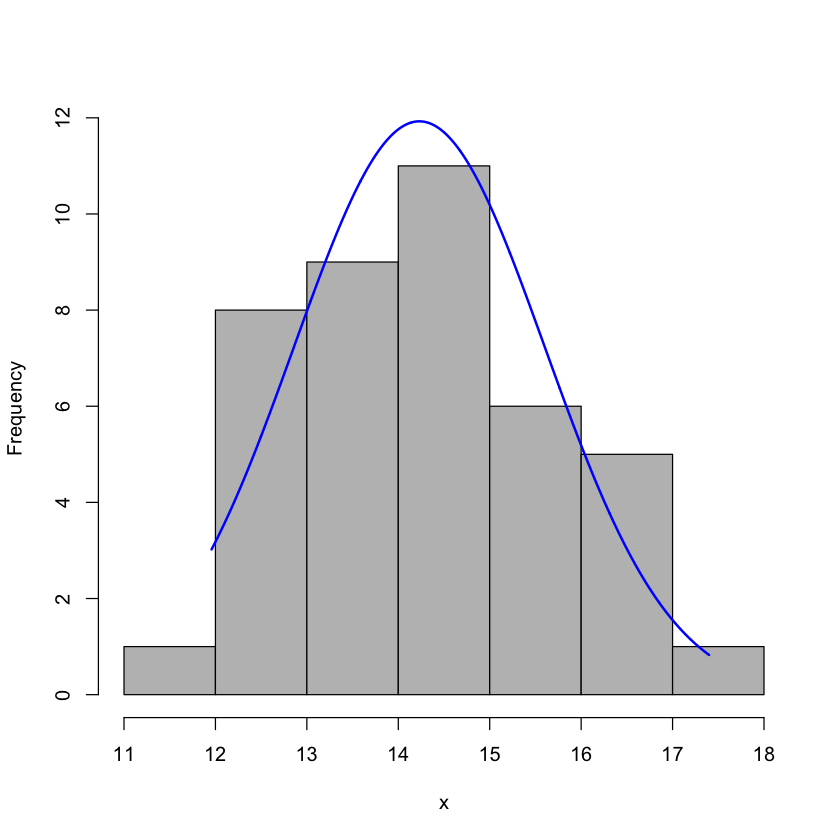

In [22]:
year1$tpLOG = log(year1$totalprod)
plotNormalHistogram(year1$tpLOG)

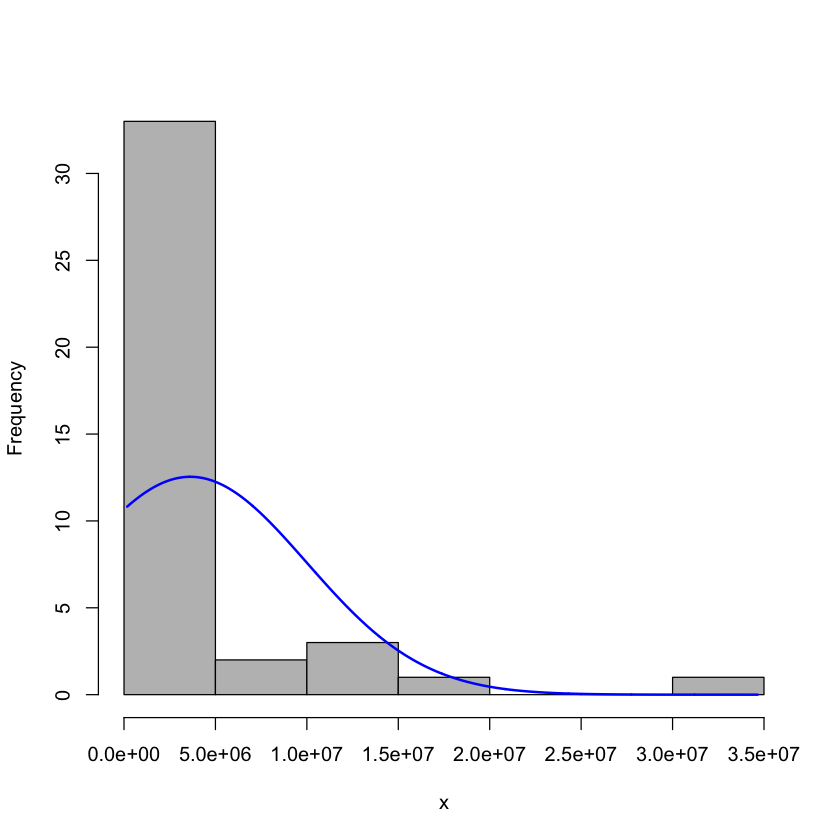

In [23]:
plotNormalHistogram(year2$totalprod)

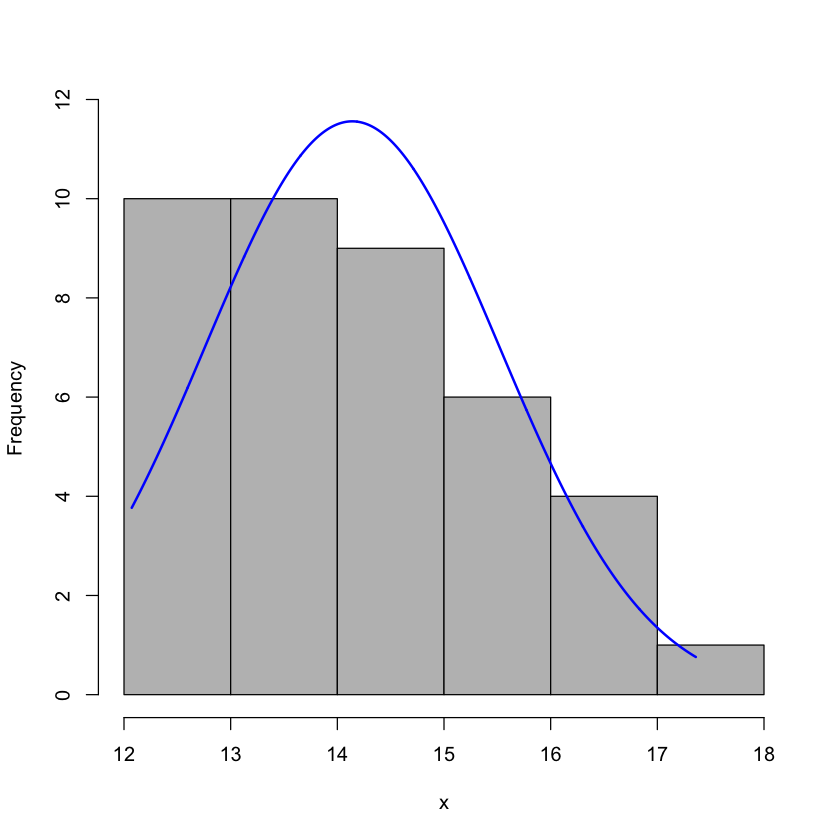

In [24]:
year2$tpLOG = log(year2$totalprod)
plotNormalHistogram(year2$tpLOG)
## more normal

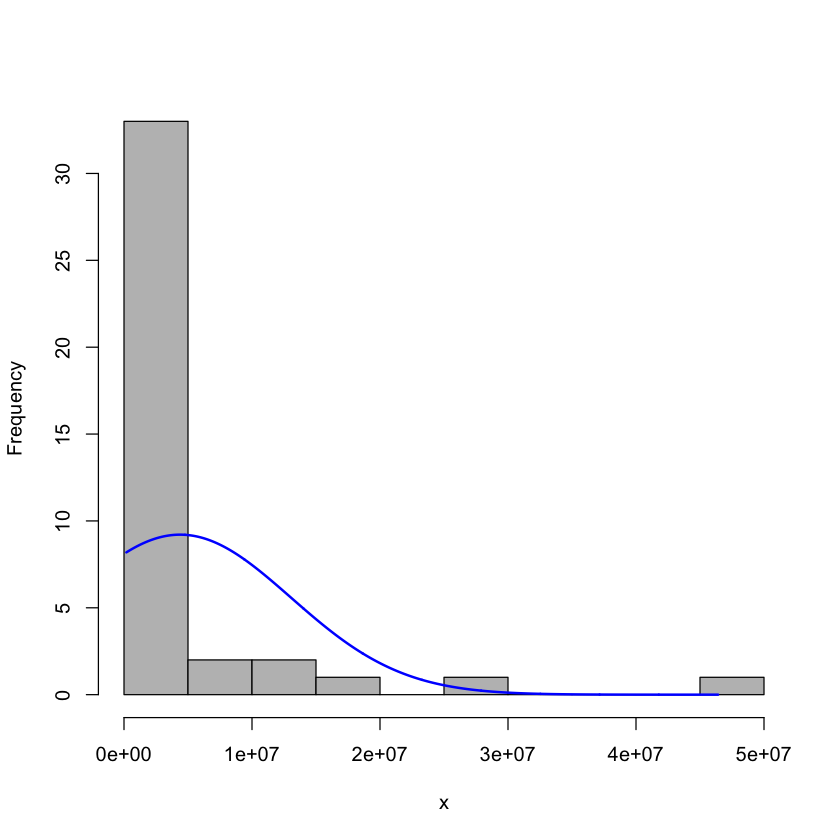

In [25]:
plotNormalHistogram(year3$totalprod)

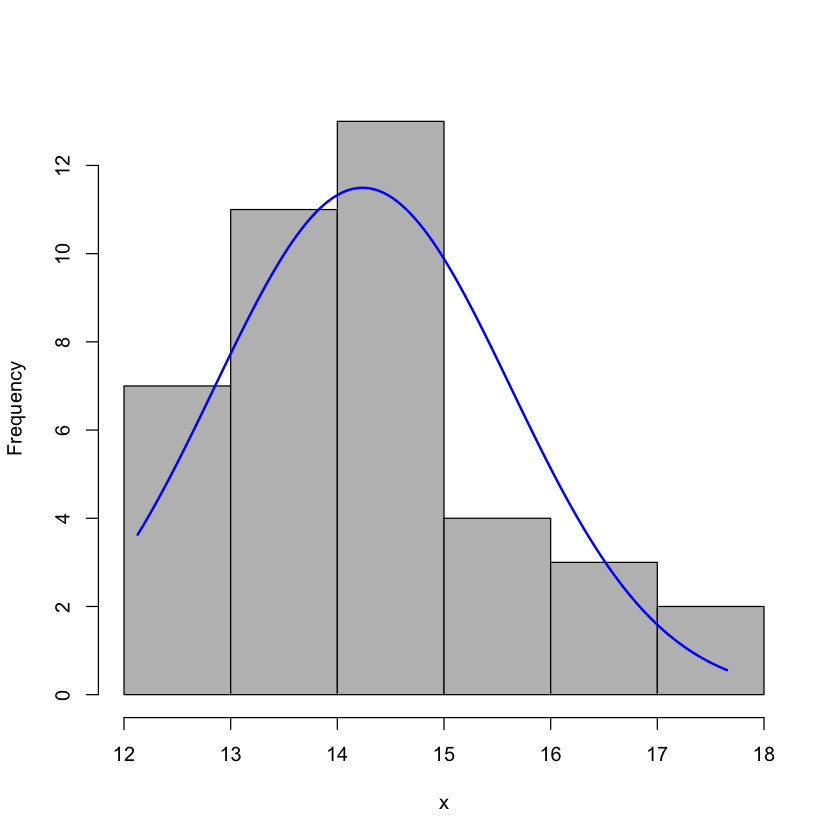

In [26]:
year3$tpLOG = log(year3$totalprod)
plotNormalHistogram(year3$tpLOG)
## more normal

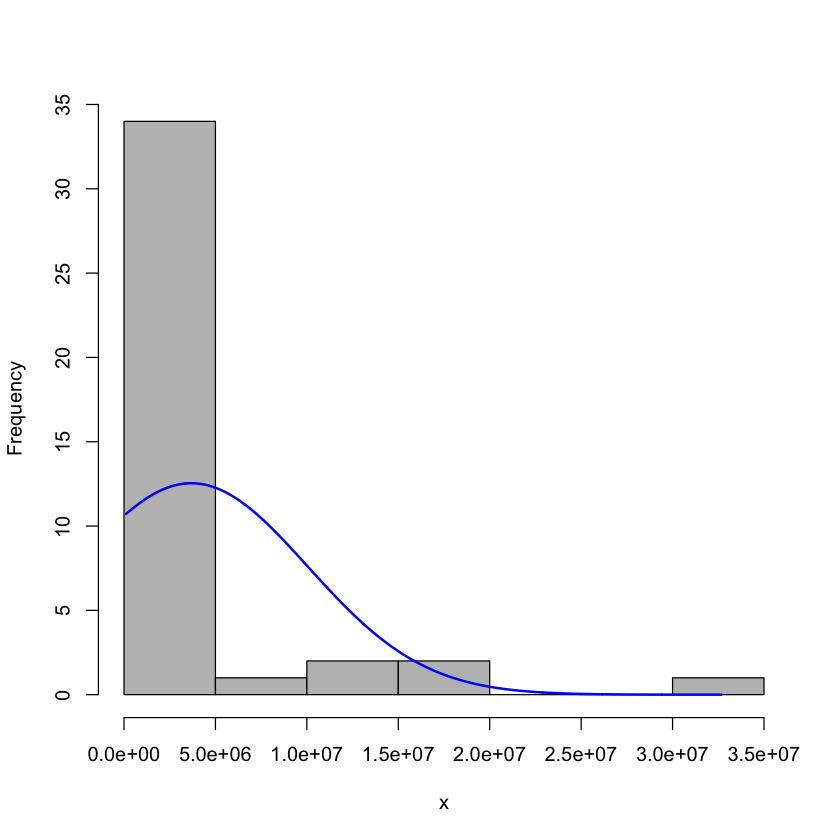

In [27]:
plotNormalHistogram(year4$totalprod)

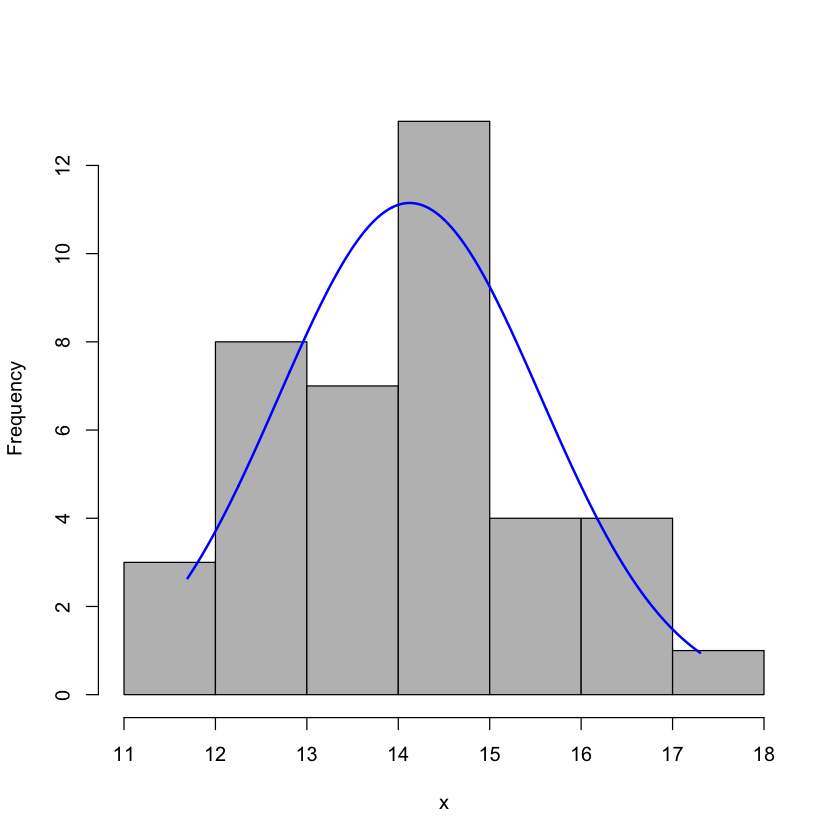

In [28]:
year4$tpLOG = log(year4$totalprod)
plotNormalHistogram(year4$tpLOG)

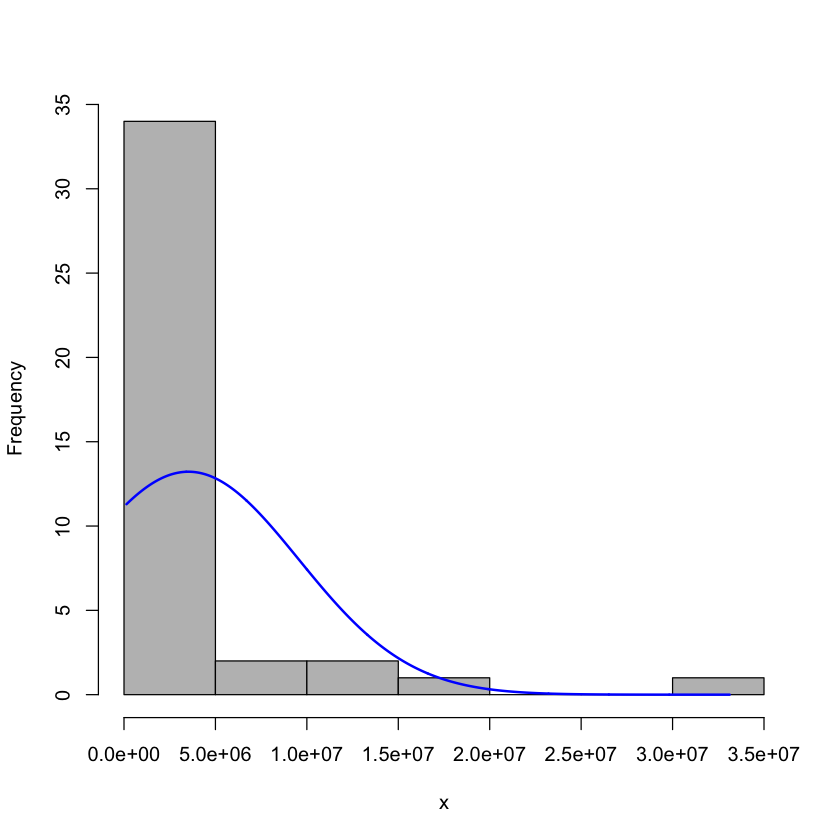

In [29]:
plotNormalHistogram(year5$totalprod)
## + skewed

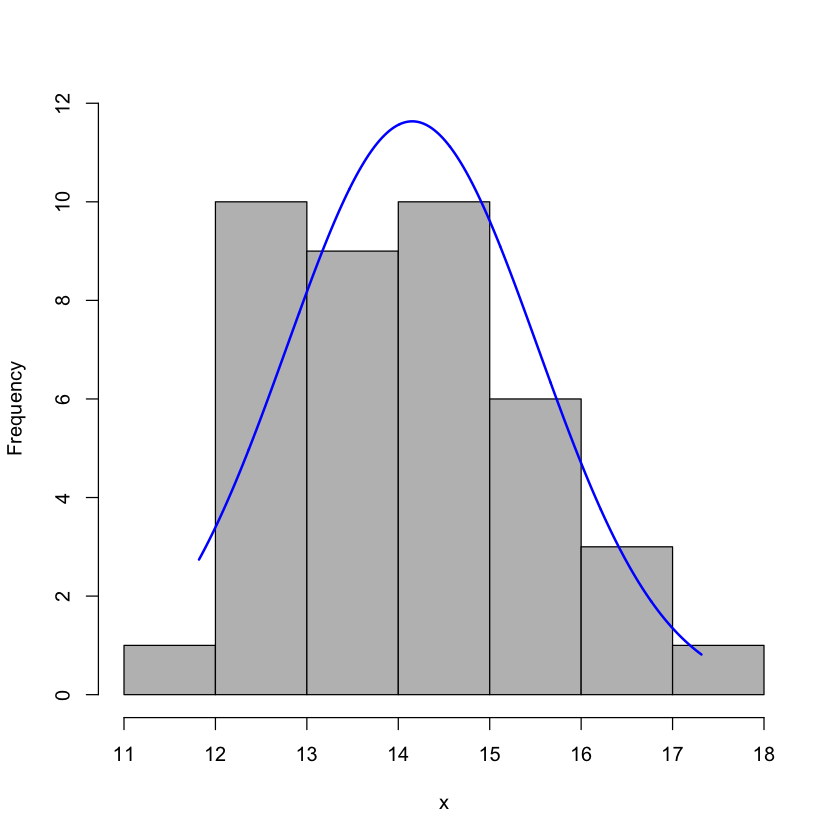

In [30]:
year5$tpLOG = log(year5$totalprod)
plotNormalHistogram(year5$tpLOG)

In [31]:
honey$tpLOG = log(honey$totalprod)

In [32]:
honey$year = as.factor(honey$year)

## Homogeneity of Varience

In [34]:
leveneTest(tpLOG ~ year, data = honey)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,0.03178299,0.9980452
,196,NA,NA


## Anova

In [35]:
RManova <- aov(tpLOG ~ year+Error(state), honey)
summary(RManova)


Error: state
          Df Sum Sq Mean Sq F value Pr(>F)
year       1    2.6   2.571   0.272  0.605
Residuals 39  368.6   9.452               

Error: Within
           Df Sum Sq Mean Sq F value  Pr(>F)   
year        4  0.677 0.16913   4.007 0.00402 **
Residuals 156  6.584 0.04221                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [37]:
RManova <- aov(tpLOG ~ year, honey)
summary(RManova)

             Df Sum Sq Mean Sq F value Pr(>F)
year          4    0.4   0.112   0.058  0.994
Residuals   196  378.0   1.929               